In [ ]:
#Import data libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

#Data modelling
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [7]:
student_impact = pd.read_csv("COVID-19 Survey Student Responses.csv")
student_impact

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [9]:
student_impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def data_cleaning_process(df):
    """
    Comprehensive data cleaning process following EDA framework
    """
    print("1. Initial Data Assessment")
    print("-----------------------")
    initial_shape = df.shape
    print(f"Initial dataset shape: {initial_shape}")
    
    # Step 1: Check and Handle Missing Values
    print("\n2. Missing Value Analysis")
    print("----------------------")
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    
    print("Columns with missing values:")
    for col in df.columns:
        if missing_values[col] > 0:
            print(f"{col}: {missing_percentages[col]:.2f}%")
    
    # Handle missing values based on data type
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            # For numeric columns, fill with median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # For categorical columns, fill with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    
    # Step 2: Check and Handle Duplicates
    print("\n3. Duplicate Records Analysis")
    print("-------------------------")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    df.drop_duplicates(inplace=True)
    
    return df

# Load the dataset
df = pd.read_csv('/Users/arisara/Downloads/COVID-19 Survey Student Responses.csv')

# Apply cleaning process
cleaned_df = data_cleaning_process(df)



1. Initial Data Assessment
-----------------------
Initial dataset shape: (1182, 19)

2. Missing Value Analysis
----------------------
Columns with missing values:
Rating of Online Class experience: 2.03%
Medium for online class: 4.31%
Prefered social media platform: 1.44%

3. Duplicate Records Analysis
-------------------------
Number of duplicate rows: 0


/var/folders/sj/hm8fcsj91r3d23qwfkdfdckm0000gn/T/ipykernel_29880/1331870050.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/var/folders/sj/hm8fcsj91r3d23qwfkdfdckm0000gn/T/ipykernel_29880/1331870050.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

<Figure size 1200x600 with 0 Axes>

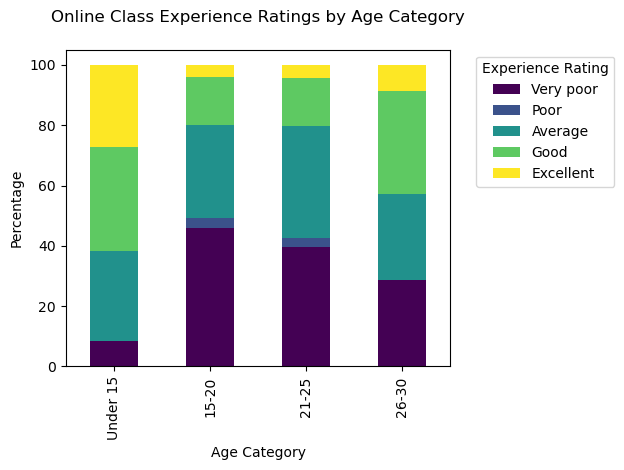


Percentage distribution:
Rating of Online Class experience  Very poor  Poor  Average   Good  Excellent
Age Category                                                                 
Under 15                                8.47  0.00    29.94  34.46      27.12
15-20                                  45.94  3.21    31.00  15.69       4.16
21-25                                  39.54  3.15    36.96  16.05       4.30
26-30                                  28.57  0.00    28.57  34.29       8.57


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_experience_by_age(df):
    # Create age categories
    df['Age Category'] = pd.cut(df['Age of Subject'], 
                               bins=[0, 15, 20, 25, 30],  # Removed the float('inf')
                               labels=['Under 15', '15-20', '21-25', '26-30'])
    
    # Create contingency table
    exp_by_age = pd.crosstab(df['Age Category'], 
                            df['Rating of Online Class experience'],
                            normalize='index') * 100
    
    # Sort columns in desired order
    order = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent']
    exp_by_age = exp_by_age.reindex(columns=order)

    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Create stacked bar chart
    ax = exp_by_age.plot(kind='bar', stacked=True, colormap='viridis')
    
    # Customize plot
    plt.title('Online Class Experience Ratings by Age Category', pad=20)
    plt.xlabel('Age Category')
    plt.ylabel('Percentage')
    
    # Adjust legend
    plt.legend(title='Experience Rating',
              bbox_to_anchor=(1.05, 1),
              loc='upper left')
    
  
    # Adjust layout to prevent cutting off
    plt.tight_layout()
    # Show plot
    plt.show()
    # Print the percentage distribution
    print("\nPercentage distribution:")
    print(exp_by_age.round(2))

# Load and process data
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

# Create plot
plot_experience_by_age(df)

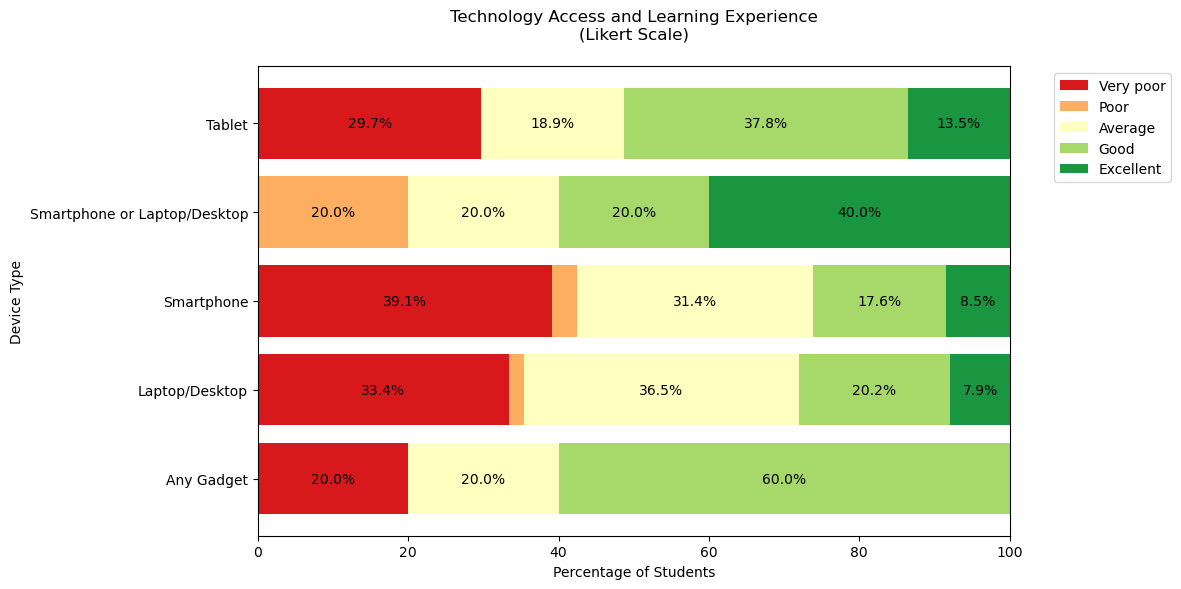

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_likert_tech_analysis(df):

    # Create cross-tabulation of devices and ratings
    tech_ratings = pd.crosstab(df['Medium for online class'], 
                              df['Rating of Online Class experience'], 
                              normalize='index') * 100
    # Convert ratings to numeric for diverging colors
    # Center point will be 'Average'
    rating_order = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent']
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    # Starting positions for bars
    left = np.zeros(len(tech_ratings))
    # Colors for different ratings
    colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']
    # Plot bars for each rating
    for idx, rating in enumerate(rating_order):
        width = tech_ratings[rating]
        ax.barh(tech_ratings.index, width, left=left, 
                color=colors[idx], label=rating)
        left += width
    
    # Customize the plot
    ax.set_title('Technology Access and Learning Experience\n(Likert Scale)', 
                pad=20)
    ax.set_xlabel('Percentage of Students')
    ax.set_ylabel('Device Type')
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add percentage labels on bars
    for i in range(len(tech_ratings)):
        cumsum = 0
        for j in range(len(rating_order)):
            value = tech_ratings.iloc[i][rating_order[j]]
            if value > 5:  # Only show labels for values > 5%
                x = cumsum + value/2
                ax.text(x, i, f'{value:.1f}%', 
                       ha='center', va='center')
            cumsum += value
    plt.tight_layout()

    return fig

#Show result
if __name__ == "__main__":
    # Create visualizations
    fig = create_likert_tech_analysis(df)
    # Display results
    plt.show()



Summary Statistics by Rating Category:

Analysis of Time spent on Online Class:
                                   mean  median   std  count
Rating of Online Class experience                           
Average                            3.56     4.0  2.00    387
Excellent                          3.58     4.0  1.88     98
Good                               3.55     4.0  2.12    230
Poor                               2.28     2.0  2.31     30
Very poor                          2.84     3.0  2.05    413


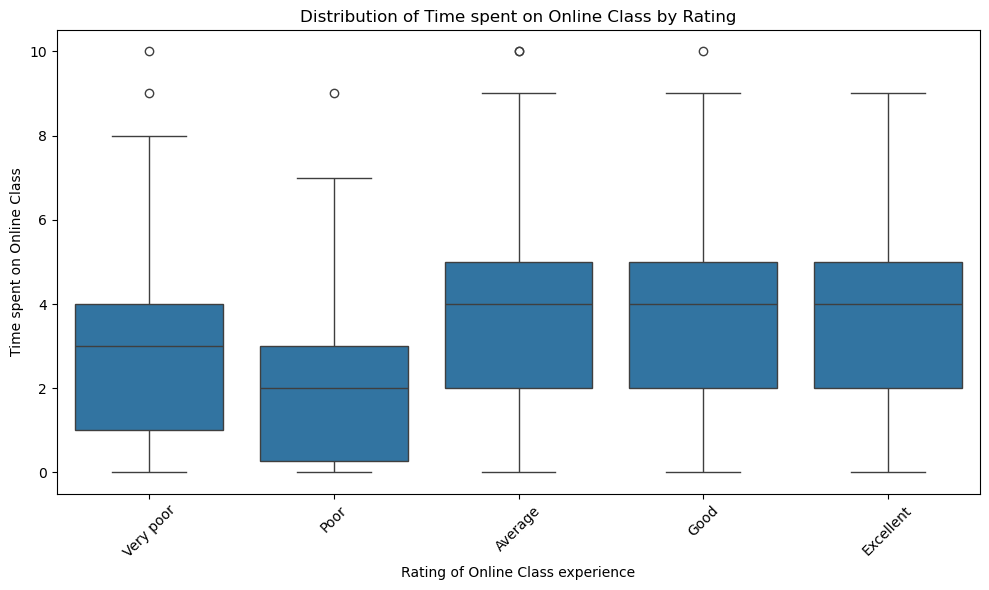


Analysis of Time spent on self study:
                                   mean  median   std  count
Rating of Online Class experience                           
Average                            2.91    2.00  2.11    387
Excellent                          3.18    2.50  2.50     98
Good                               2.86    2.75  1.71    230
Poor                               3.33    2.00  2.65     30
Very poor                          2.84    2.00  2.20    413


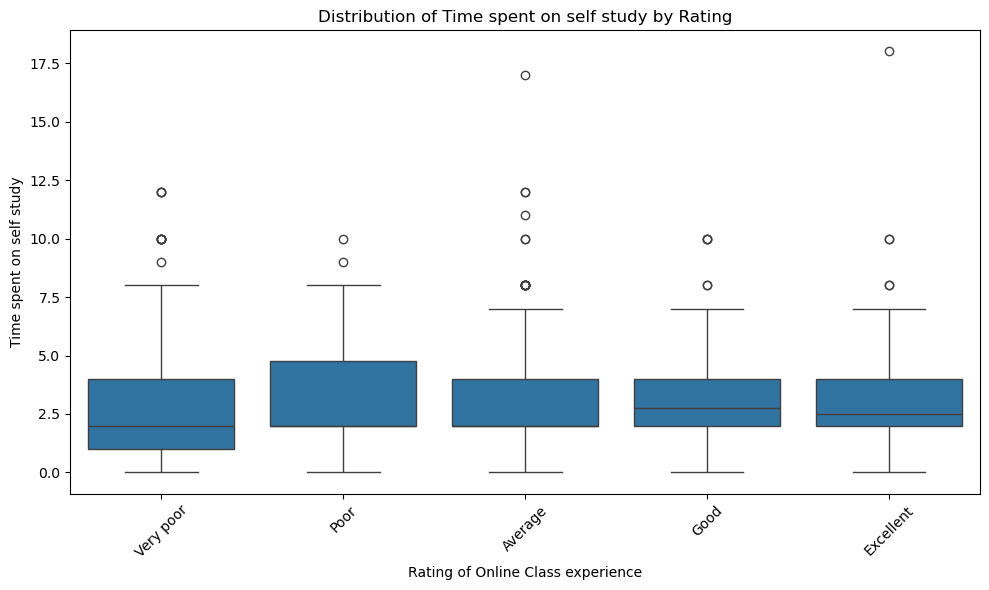

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a rating mapping dictionary
rating_map = {
    'Very poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}

# Create a copy of the dataframe to avoid modifying the original
df_analysis = df.copy()
# Convert rating to numeric
df_analysis['Rating_Numeric'] = df_analysis['Rating of Online Class experience'].map(rating_map)

# Select relevant columns for analysis
routine_cols = [
    'Time spent on Online Class',
    'Time spent on self study',
    'Time spent on fitness',
    'Time spent on sleep',
    'Time spent on social media',
    'Rating_Numeric'  # Using numeric rating instead of categorical
]
# Calculate average time spent for each rating category
def analyze_time_by_rating(df, time_column):
    return df.groupby('Rating of Online Class experience')[time_column].agg([
        'mean', 'median', 'std', 'count'
    ]).round(2)

# Create summary statistics for each time variable
time_variables = [
    'Time spent on Online Class',
    'Time spent on self study',
]

# Print summary statistics
print("\nSummary Statistics by Rating Category:")
for var in time_variables:
    print(f"\nAnalysis of {var}:")
    print(analyze_time_by_rating(df_analysis, var))
    
    # Create box plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Rating of Online Class experience', y=var, data=df_analysis,
                order=['Very poor', 'Poor', 'Average', 'Good', 'Excellent'])
    plt.title(f'Distribution of {var} by Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


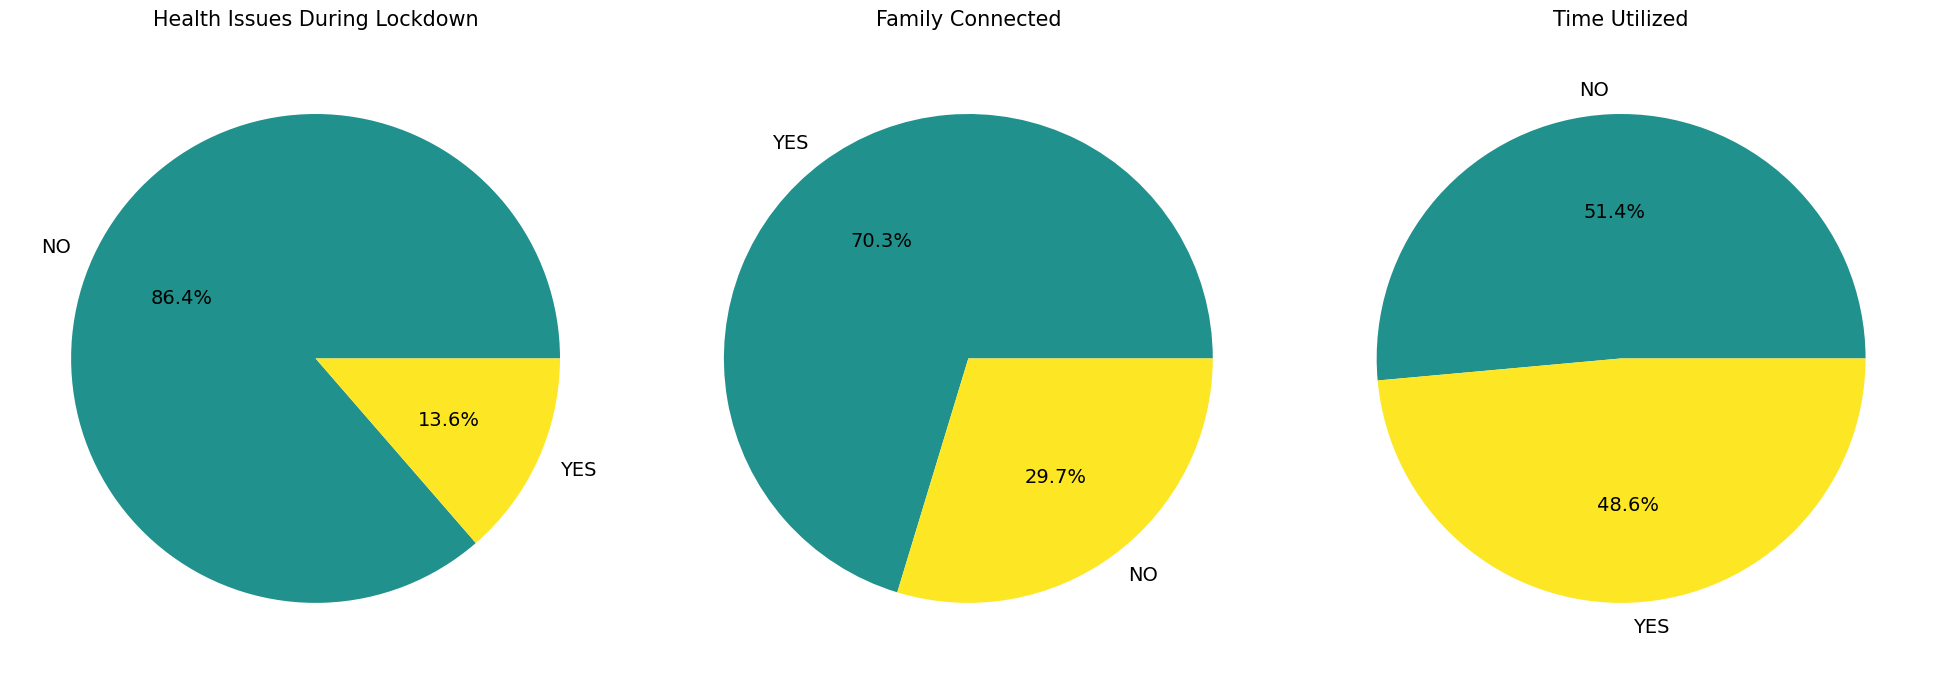

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Create figure with subplots
fig = plt.figure(figsize=(20, 15))

#Health Issues Pie Chart
plt.subplot(2, 3, 4)
health_issues = df['Health issue during lockdown'].value_counts()
plt.pie(health_issues.values, labels=health_issues.index, autopct='%1.1f%%',
        colors=['#20918c', '#fde724'], textprops={'fontsize': 14})
plt.title('Health Issues During Lockdown', pad=20, fontsize=15)

#Family conncenect
plt.subplot(2, 3, 5)
family_connect = df['Do you find yourself more connected with your family, close friends , relatives  ?'].value_counts()
plt.pie(family_connect.values, labels=family_connect.index, autopct='%1.1f%%',
        colors=['#20918c', '#fde724'], textprops={'fontsize': 14})
plt.title('Family Connected', pad=20, fontsize=15)

#Time utlized
plt.subplot(2, 3, 6)
time_utilized = df['Time utilized'].value_counts()
plt.pie(time_utilized.values, labels=time_utilized.index, autopct='%1.1f%%',
        colors=['#20918c', '#fde724'], textprops={'fontsize': 14})
plt.title('Time Utilized', pad=20, fontsize=15)

plt.tight_layout(pad=3.0)
plt.show()


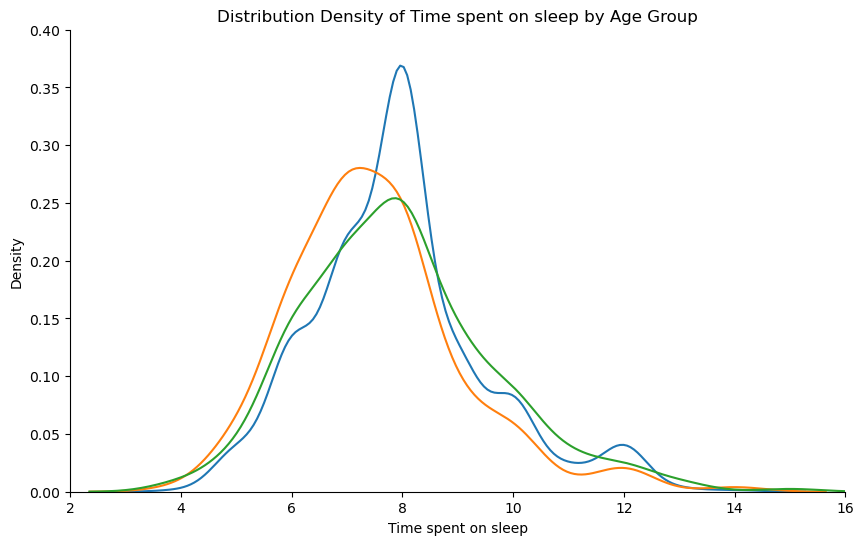

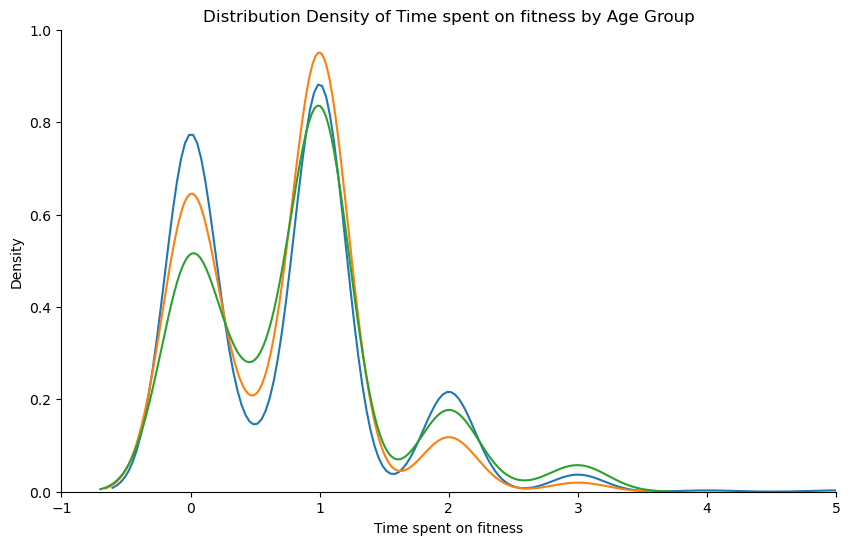

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_time_distributions(df):
    # Create age groups
    bins = [7, 17, 22, 59]
    labels = ['7-17', '18-22', '23-59']
    df['Age_Group'] = pd.cut(df['Age of Subject'], bins=bins, labels=labels)
    
    # Create plots for both sleep and fitness
    variables = ['Time spent on sleep', 'Time spent on fitness']
    
    for var in variables:
        plt.figure(figsize=(10, 6))
        
        # Plot distribution for each age group
        for age_group in ['18-22', '23-59', '7-17']:  # Specific order to match legend
            sns.kdeplot(data=df[df['Age_Group'] == age_group][var], 
                       label=age_group)
        
        # Customize plot
        plt.title(f'Distribution Density of {var} by Age Group')
        plt.xlabel(var)
        plt.ylabel('Density')
        
        # Remove top and right spines
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # Set specific axis limits based on the variable
        if var == 'Time spent on sleep':
            plt.xlim(2, 16)
            plt.ylim(0, 0.4)
        else:  # Time spent on fitness
            plt.xlim(-1, 5)
            plt.ylim(0, 1.0)
        
        # Show plot
        plt.show()

# Load data
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
# Create plots
plot_time_distributions(df)

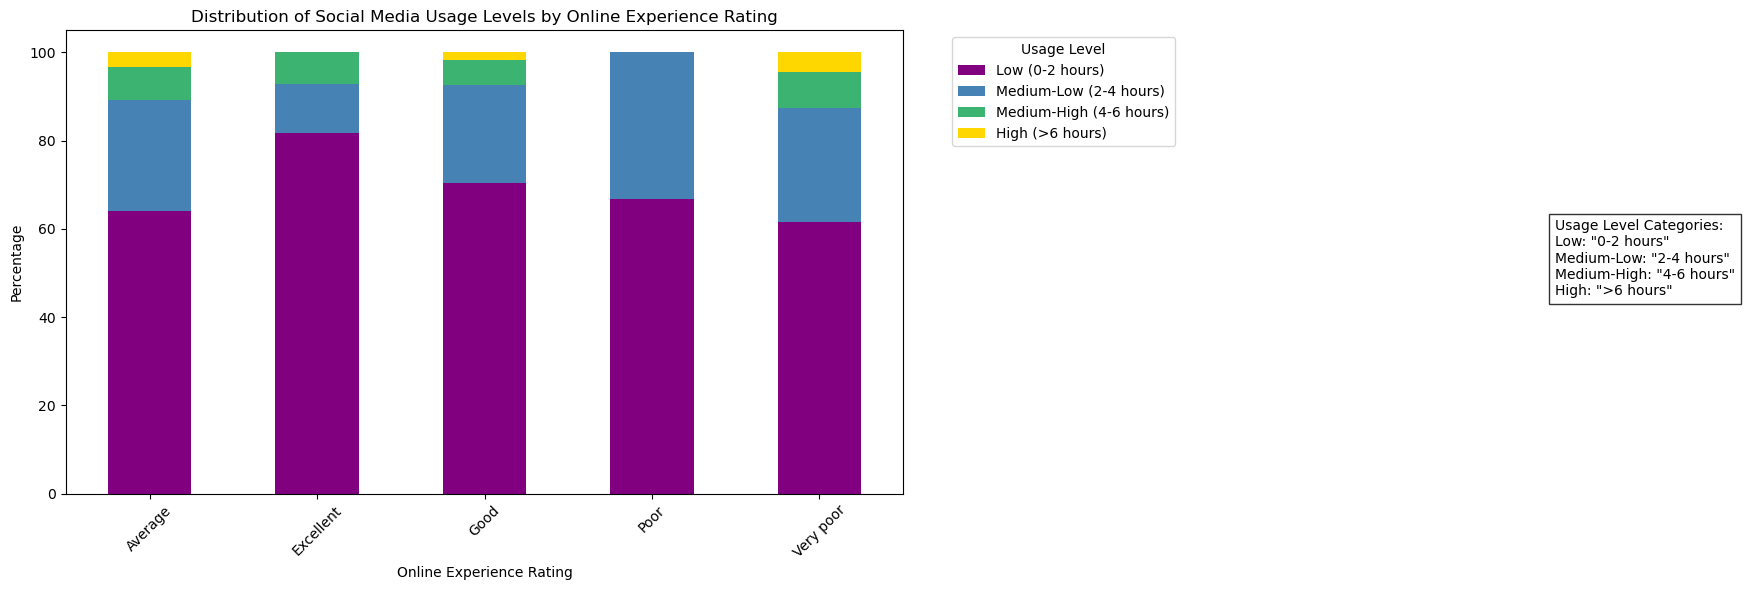


Number of students in each usage category:
Usage Level
Low (0-2 hours)            776
Medium-Low (2-4 hours)     282
Medium-High (4-6 hours)     87
High (>6 hours)             37
Name: count, dtype: int64

Average social media time (hours) by experience rating:
Rating of Online Class experience
Average      2.42
Excellent    1.67
Good         2.13
Poor         1.93
Very poor    2.60
Name: Time spent on social media, dtype: float64


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_social_media_categories(df):
    # Create a copy of the dataframe
    data = df.copy()
    # Convert social media time to numeric, handling any non-numeric values
    data['Time spent on social media'] = pd.to_numeric(data['Time spent on social media'], errors='coerce')
    
    # Define usage level categories
    # Low: 0-2 hours, Medium-Low: 2-4 hours, Medium-High: 4-6 hours, High: >6 hours
    bins = [0, 2, 4, 6, float('inf')]
    labels = ['Low (0-2 hours)', 'Medium-Low (2-4 hours)', 'Medium-High (4-6 hours)', 'High (>6 hours)']
    
    # Categorize social media time
    data['Usage Level'] = pd.cut(data['Time spent on social media'], 
                                bins=bins,
                                labels=labels,
                                include_lowest=True)
    
    # Calculate percentages for each experience rating
    percentages = pd.crosstab(data['Rating of Online Class experience'],
                             data['Usage Level'],
                             normalize='index') * 100
    
    # Create stacked bar chart
    ax = percentages.plot(kind='bar',
                         stacked=True,
                         figsize=(12, 6),
                         color=['purple', 'steelblue', 'mediumseagreen', 'gold'])
    
    plt.title('Distribution of Social Media Usage Levels by Online Experience Rating')
    plt.xlabel('Online Experience Rating')
    plt.ylabel('Percentage')
    plt.legend(title='Usage Level', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    # Add a text box with category definitions
    category_text = 'Usage Level Categories:\nLow: "0-2 hours"\nMedium-Low: "2-4 hours"\nMedium-High: "4-6 hours"\nHigh: ">6 hours"'
    plt.figtext(1.3, 0.5, category_text, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print the distribution of students in each category
    print("\nNumber of students in each usage category:")
    print(data['Usage Level'].value_counts().sort_index())
    
    # Print average social media time for each experience rating
    print("\nAverage social media time (hours) by experience rating:")
    avg_time = data.groupby('Rating of Online Class experience')['Time spent on social media'].mean().round(2)
    print(avg_time)

# Run the analysis
create_social_media_categories(df)



In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


def read_and_validate_data(file_path):
    """
    Read and validate the dataset from CSV file
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pd.DataFrame: Cleaned and validated dataset
    """
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Define required columns for our analysis
        required_columns = [
            'Rating of Online Class experience',
            'Time spent on Online Class',
            'Time spent on self study',
            'Medium for online class',
            'Time spent on fitness',
            'Time spent on sleep',
            'Change in your weight',
            'Health issue during lockdown',
            'Time spent on social media',
            'Time spent on TV',
            'Time utilized',
            'Do you find yourself more connected with your family, close friends , relatives  ?'
        ]
        
        # Verify all required columns exist
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")
        
        # Handle missing values
        # For numerical columns, fill with median
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            df[col] = df[col].fillna(df[col].median())
            
        # For categorical columns, fill with mode
        categorical_columns = df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        
        return df
    
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {file_path}")
    except Exception as e:
        raise Exception(f"Error reading data: {str(e)}")

class OnlineLearningAnalyzer:
    def __init__(self):
        self.feature_groups = {
            'learning_experience': ['Time spent on Online Class', 'Time spent on self study'],
            'technology_access': ['Medium for online class'],
            'physical_wellbeing': ['Time spent on fitness', 'Time spent on sleep', 
                                 'Change in your weight', 'Health issue during lockdown'],
            'daily_routine': ['Time spent on social media', 'Time spent on TV', 
                            'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?']
        }
        self.models = {}
        self.scalers = {}
        self.encoders = {}
    
    def preprocess_data(self, df):
        """
        Preprocess data for each feature group
        """
        processed_data = {}
        
        # Convert target variable to binary
        target_mapping = {
            'Excellent': 1, 'Good': 1,
            'Average': 0, 'Poor': 0, 'Very poor': 0
        }
        y = df['Rating of Online Class experience'].map(target_mapping)
        
        for group_name, features in self.feature_groups.items():
            # Select only features that exist in the dataframe
            valid_features = [f for f in features if f in df.columns]
            X_group = df[valid_features].copy()
            
            # Create encoders for categorical variables
            self.encoders[group_name] = LabelEncoder()
            categorical_cols = X_group.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                X_group[col] = self.encoders[group_name].fit_transform(X_group[col].astype(str))
            
            # Scale numerical features
            self.scalers[group_name] = StandardScaler()
            X_group = pd.DataFrame(self.scalers[group_name].fit_transform(X_group),
                                 columns=X_group.columns)
            
            processed_data[group_name] = (X_group, y)
        
        return processed_data

    def get_feature_importance(self, model, feature_names):
        """
        Extract feature importance from the model
        
        Parameters:
        model: trained model (RandomForest, XGBoost, or LogisticRegression)
        feature_names: list of feature names
        
        Returns:
        DataFrame with feature importance scores
        """
        try:
            # For RandomForest and XGBoost
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
            # For LogisticRegression
            elif hasattr(model, 'coef_'):
                importance = np.abs(model.coef_[0])
            else:
                print(f"Warning: Model {type(model).__name__} doesn't provide feature importance")
                return pd.DataFrame()
            
            # Create and sort importance DataFrame
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importance
            })
            return importance_df.sort_values('importance', ascending=False)
            
        except Exception as e:
            print(f"Error calculating feature importance: {str(e)}")
            return pd.DataFrame()

    def train_models(self, processed_data):
        """Train models for each feature group using cross-validation"""
        for group_name, (X, y) in processed_data.items():
            # Initialize models for this group
            group_models = {
                'rf': RandomForestClassifier(random_state=42, class_weight='balanced'),
                'xgb': XGBClassifier(random_state=42, scale_pos_weight=1),
                'logistic': LogisticRegression(random_state=42, class_weight='balanced')
            }
            
            # Train and evaluate models
            group_results = {}
            for model_name, model in group_models.items():
                # Perform cross-validation
                cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
                
                # Train final model on full dataset for feature importance
                model.fit(X, y)
                
                # Store results
                group_results[model_name] = {
                    'model': model,
                    'cv_accuracy_mean': cv_scores.mean(),
                    'cv_accuracy_std': cv_scores.std(),
                    'feature_importance': self.get_feature_importance(model, X.columns)
                }
            
            self.models[group_name] = group_results
    
    def analyze_group_performance(self):
        """Analyze and compare performance across groups"""
        performance_summary = {}
        
        for group_name, models in self.models.items():
            group_performance = {}
            for model_name, results in models.items():
                group_performance[model_name] = {
                    'mean_accuracy': round(results['cv_accuracy_mean'] * 100, 2),
                    'std_accuracy': round(results['cv_accuracy_std'] * 100, 2)
                }
            
            performance_summary[group_name] = group_performance
        
        return pd.DataFrame(performance_summary)
    
    def get_top_predictors(self):
        """Identify top predictors from each group"""
        top_predictors = {}
        
        for group_name, models in self.models.items():
            # Get feature importance from Random Forest model
            if 'rf' in models and 'feature_importance' in models['rf']:
                rf_importance = models['rf']['feature_importance']
                top_predictors[group_name] = rf_importance.head(3)
        
        return top_predictors
    def train_models(self, processed_data):
        """Train models for each feature group using cross-validation"""
        for group_name, (X, y) in processed_data.items():
            # Initialize models for this group
            group_models = {
                'rf': RandomForestClassifier(random_state=42, class_weight='balanced'),
                'xgb': XGBClassifier(random_state=42, scale_pos_weight=1),
                'logistic': LogisticRegression(random_state=42, class_weight='balanced')
            }
            
            # Train and evaluate models
            group_results = {}
            for model_name, model in group_models.items():
                # Perform cross-validation
                cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
                
                # Train final model on full dataset for feature importance
                model.fit(X, y)
                
                # Store results
                group_results[model_name] = {
                    'model': model,
                    'cv_accuracy_mean': cv_scores.mean(),
                    'cv_accuracy_std': cv_scores.std(),
                    'feature_importance': self.get_feature_importance(model, X.columns)
                }
            
            self.models[group_name] = group_results
    
    def analyze_group_performance(self):
        """Analyze and compare performance across groups"""
        performance_summary = {}
        
        for group_name, models in self.models.items():
            group_performance = {}
            for model_name, results in models.items():
                group_performance[model_name] = {
                    'mean_accuracy': round(results['cv_accuracy_mean'] * 100, 2),
                    'std_accuracy': round(results['cv_accuracy_std'] * 100, 2)
                }
            
            performance_summary[group_name] = group_performance
        
        return pd.DataFrame(performance_summary)

def main():
    """Main execution function"""
    try:
        # Read data
        file_path = "COVID-19 Survey Student Responses.csv"
        df = read_and_validate_data(file_path)
        
        # Initialize analyzer
        analyzer = OnlineLearningAnalyzer()
        
        # Process data and train models
        processed_data = analyzer.preprocess_data(df)
        analyzer.train_models(processed_data)
        
        # Get results
        results = {
            'performance': analyzer.analyze_group_performance(),
            'top_predictors': analyzer.get_top_predictors()
        }
        
        # Print results
        print("\nModel Performance by Feature Group (Cross-Validation):")
        print(results['performance'])
        print("\nFormat: mean_accuracy% ± std_accuracy%")
        
        print("\nTop Predictors by Feature Group:")
        for group, predictors in results['top_predictors'].items():
            print(f"\n{group.upper()}:")
            print(predictors)
            
    except Exception as e:
        print(f"Error in analysis: {str(e)}")
        raise  # This will show the full error traceback

if __name__ == "__main__":
    main()


Model Performance by Feature Group (Cross-Validation):
                                     learning_experience  \
rf        {'mean_accuracy': 54.06, 'std_accuracy': 2.08}   
xgb       {'mean_accuracy': 69.88, 'std_accuracy': 1.97}   
logistic  {'mean_accuracy': 54.65, 'std_accuracy': 5.66}   

                                        technology_access  \
rf        {'mean_accuracy': 53.16, 'std_accuracy': 16.95}   
xgb        {'mean_accuracy': 71.66, 'std_accuracy': 0.93}   
logistic   {'mean_accuracy': 49.83, 'std_accuracy': 8.93}   

                                      physical_wellbeing  \
rf         {'mean_accuracy': 54.49, 'std_accuracy': 2.0}   
xgb       {'mean_accuracy': 69.12, 'std_accuracy': 2.13}   
logistic  {'mean_accuracy': 51.19, 'std_accuracy': 3.47}   

                                           daily_routine  
rf        {'mean_accuracy': 59.48, 'std_accuracy': 4.11}  
xgb       {'mean_accuracy': 69.71, 'std_accuracy': 2.62}  
logistic  {'mean_accuracy': 61.59, 'std_

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def compare_model_accuracy(df):
    # Define feature groups
    feature_groups = {
        'learning_experience': ['Time spent on Online Class', 'Time spent on self study'],
        'technology_access': ['Medium for online class'],
        'physical_wellbeing': ['Time spent on fitness', 'Time spent on sleep', 
                             'Change in your weight', 'Health issue during lockdown'],
        'daily_routine': ['Time spent on social media', 'Time spent on TV', 
                         'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?']
    }
    
    # Convert target variable to binary
    target_mapping = {
        'Excellent': 1, 'Good': 1,
        'Average': 0, 'Poor': 0, 'Very poor': 0
    }
    
    # Drop rows where target variable is NaN
    df_clean = df.dropna(subset=['Rating of Online Class experience'])
    y = df_clean['Rating of Online Class experience'].map(target_mapping)
    
    # Initialize results dictionary
    results = {}
    
    # Process each feature group
    for group_name, features in feature_groups.items():
        # Select and preprocess features
        valid_features = [f for f in features if f in df_clean.columns]
        X_group = df_clean[valid_features].copy()
        
        # Handle NaN values
        for col in X_group.columns:
            if X_group[col].dtype in ['int64', 'float64']:
                X_group[col] = X_group[col].fillna(X_group[col].median())
            else:
                X_group[col] = X_group[col].fillna(X_group[col].mode()[0])
        
        # Encode categorical variables
        le = LabelEncoder()
        categorical_cols = X_group.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            X_group[col] = le.fit_transform(X_group[col].astype(str))
        
        # Scale features
        scaler = StandardScaler()
        X_group = pd.DataFrame(scaler.fit_transform(X_group), columns=X_group.columns)
        
        # Initialize models
        models = {
            'rf': RandomForestClassifier(random_state=42, class_weight='balanced'),
            'xgb': XGBClassifier(random_state=42, scale_pos_weight=1),
            'logistic': LogisticRegression(random_state=42, class_weight='balanced')
        }
        
        # Calculate accuracy for each model
        group_results = {}
        for model_name, model in models.items():
            cv_scores = cross_val_score(model, X_group, y, cv=5, scoring='accuracy')
            group_results[model_name] = {
                'mean_accuracy': round(cv_scores.mean() * 100, 2),
                'std_accuracy': round(cv_scores.std() * 100, 2)
            }
        
        results[group_name] = group_results
    
    # Convert results to DataFrame for display
    performance_df = pd.DataFrame(results)
    print("\nModel Performance by Feature Group (Cross-Validation):")
    print(performance_df)
    print("\nFormat: mean_accuracy% ± std_accuracy%")
    
    return performance_df


if __name__ == "__main__":
    df = pd.read_csv("COVID-19 Survey Student Responses.csv")
    performance_results = compare_model_accuracy(df)




Model Performance by Feature Group (Cross-Validation):
                                     learning_experience  \
rf         {'mean_accuracy': 52.85, 'std_accuracy': 1.8}   
xgb       {'mean_accuracy': 69.09, 'std_accuracy': 1.92}   
logistic  {'mean_accuracy': 53.88, 'std_accuracy': 5.37}   

                                        technology_access  \
rf        {'mean_accuracy': 49.06, 'std_accuracy': 13.48}   
xgb        {'mean_accuracy': 71.07, 'std_accuracy': 0.94}   
logistic   {'mean_accuracy': 49.22, 'std_accuracy': 9.04}   

                                      physical_wellbeing  \
rf        {'mean_accuracy': 54.06, 'std_accuracy': 1.34}   
xgb       {'mean_accuracy': 68.74, 'std_accuracy': 2.85}   
logistic  {'mean_accuracy': 51.73, 'std_accuracy': 3.83}   

                                           daily_routine  
rf        {'mean_accuracy': 58.89, 'std_accuracy': 4.09}  
xgb       {'mean_accuracy': 69.08, 'std_accuracy': 2.68}  
logistic  {'mean_accuracy': 61.92, 'std_